In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
train_path = "C:\\Users\\Ajit Govind Kulkarni\\train"
valid_path = "C:\\Users\\Ajit Govind Kulkarni\\val"
test_path = "C:\\Users\\Ajit Govind Kulkarni\\test"

# Data Preprocessing

In [3]:
traindatagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_batches=traindatagen.flow_from_directory(directory=train_path, target_size=(150, 150), batch_size=10)

Found 3319 images belonging to 12 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_batches = valid_datagen.flow_from_directory(directory=valid_path,shuffle = False, target_size=(150, 150), batch_size=10)

Found 1431 images belonging to 12 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_directory(directory=test_path,shuffle = False, target_size=(150, 150), batch_size=10)

Found 794 images belonging to 1 classes.


In [ ]:
# Pretrained VGG16 model

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
image_width, image_height = 150,150
vgg16 = VGG16(input_shape=(image_width,image_height,3),include_top=False, weights="imagenet")
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Observations:

# making include_top=False, gives us the flexibility to train the model with images size pf our choice
# weights are imported from imagenet

In [9]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
x = vgg16.layers[-1].output
flatten=Flatten()(x)
bn=BatchNormalization()(flatten)
do=Dropout(0.5)(bn)
do = Dense(units=32, activation='relu')(do)
output = Dense(units=12, activation='softmax')(do)
model = Model(inputs=vgg16.input, outputs=output)

In [10]:
for layer in model.layers[:-9]:
    layer.trainable=False

In [ ]:
# Observations:

# Flatten layer is added followed by a batch normalization and two dense layers
# Last layer is softmax and contain 6 units, because we have 12 classes of images
# All layers are frozen except last nine

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
import cv2

In [15]:
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Training the model

In [ ]:
history = model.fit_generator(train_batches,validation_data=valid_batches, epochs=50)

C:\Users\AJITGO~1\AppData\Local\Temp/ipykernel_15568/2207161077.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batches,validation_data=valid_batches, epochs=50)


Epoch 1/50
332/332 [==============================] - ETA: 0s - loss: 2.2867 - accuracy: 0.2416

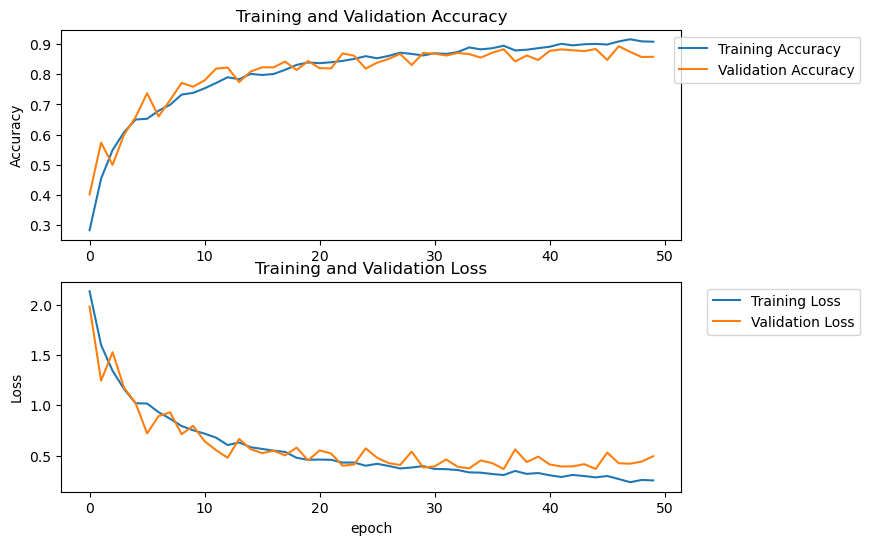

In [27]:
import matplotlib.pyplot as plt

acc      = model.history.history['accuracy']
val_acc  = model.history.history['val_accuracy']
loss     = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right')
plt.ylabel('Loss')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
model.save('R2_VGG_16.h5')
R2Vgg16 = tf.keras.models.load_model('R2_VGG_16.h5')
predictionsV2 = R2Vgg16.predict(x=valid_batches, steps=len(valid_batches), verbose=0)
scores = R2Vgg16.evaluate(valid_batches, verbose=0)
print("%s: %.2f%%" % (R2Vgg16.metrics_names[1], scores[1]*100))

accuracy: 85.81%


                           precision    recall  f1-score   support

              Black-grass       0.56      0.57      0.56        79
                 Charlock       0.97      0.93      0.95       117
                 Cleavers       0.83      0.94      0.88        87
         Common Chickweed       0.88      0.99      0.93       184
             Common wheat       0.82      0.90      0.86        67
                  Fat Hen       0.95      0.76      0.84       143
         Loose Silky-bent       0.81      0.82      0.82       197
                    Maize       0.97      0.87      0.91        67
        Scentless Mayweed       0.92      0.79      0.85       155
          Shepherds Purse       0.78      0.57      0.66        70
Small-flowered Cranesbill       0.94      0.99      0.96       149
               Sugar beet       0.78      0.97      0.86       116

                 accuracy                           0.86      1431
                macro avg       0.85      0.84      0.84    

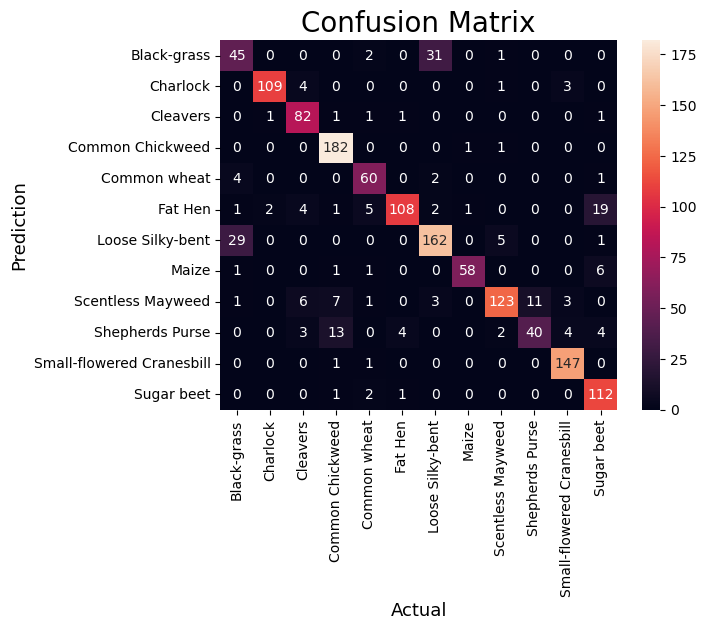

In [28]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import seaborn as sns

target_names = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

y_true=valid_batches.classes 
y_pred=predictionsV2.argmax(axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
#compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
 
#Plot the confusion matrix.
fig=sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'],
            yticklabels=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [29]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [30]:
test_batches.filenames[:5]

['test\\0021e90e4.png',
 'test\\003d61042.png',
 'test\\007b3da8b.png',
 'test\\0086a6340.png',
 'test\\00c47e980.png']

In [31]:
preds_cls_idx = predictions.argmax(axis=-1)

In [32]:
# https://stackoverflow.com/questions/57516673/how-to-perform-prediction-using-predict-generator-on-unlabeled-test-data-in-kera
import numpy as np
idx_to_cls = {v: k for k, v in train_batches.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(test_batches.filenames, preds_cls))

In [33]:
filenames_to_cls[:5]

[('test\\0021e90e4.png', 'Small-flowered Cranesbill'),
 ('test\\003d61042.png', 'Fat Hen'),
 ('test\\007b3da8b.png', 'Sugar beet'),
 ('test\\0086a6340.png', 'Common Chickweed'),
 ('test\\00c47e980.png', 'Sugar beet')]

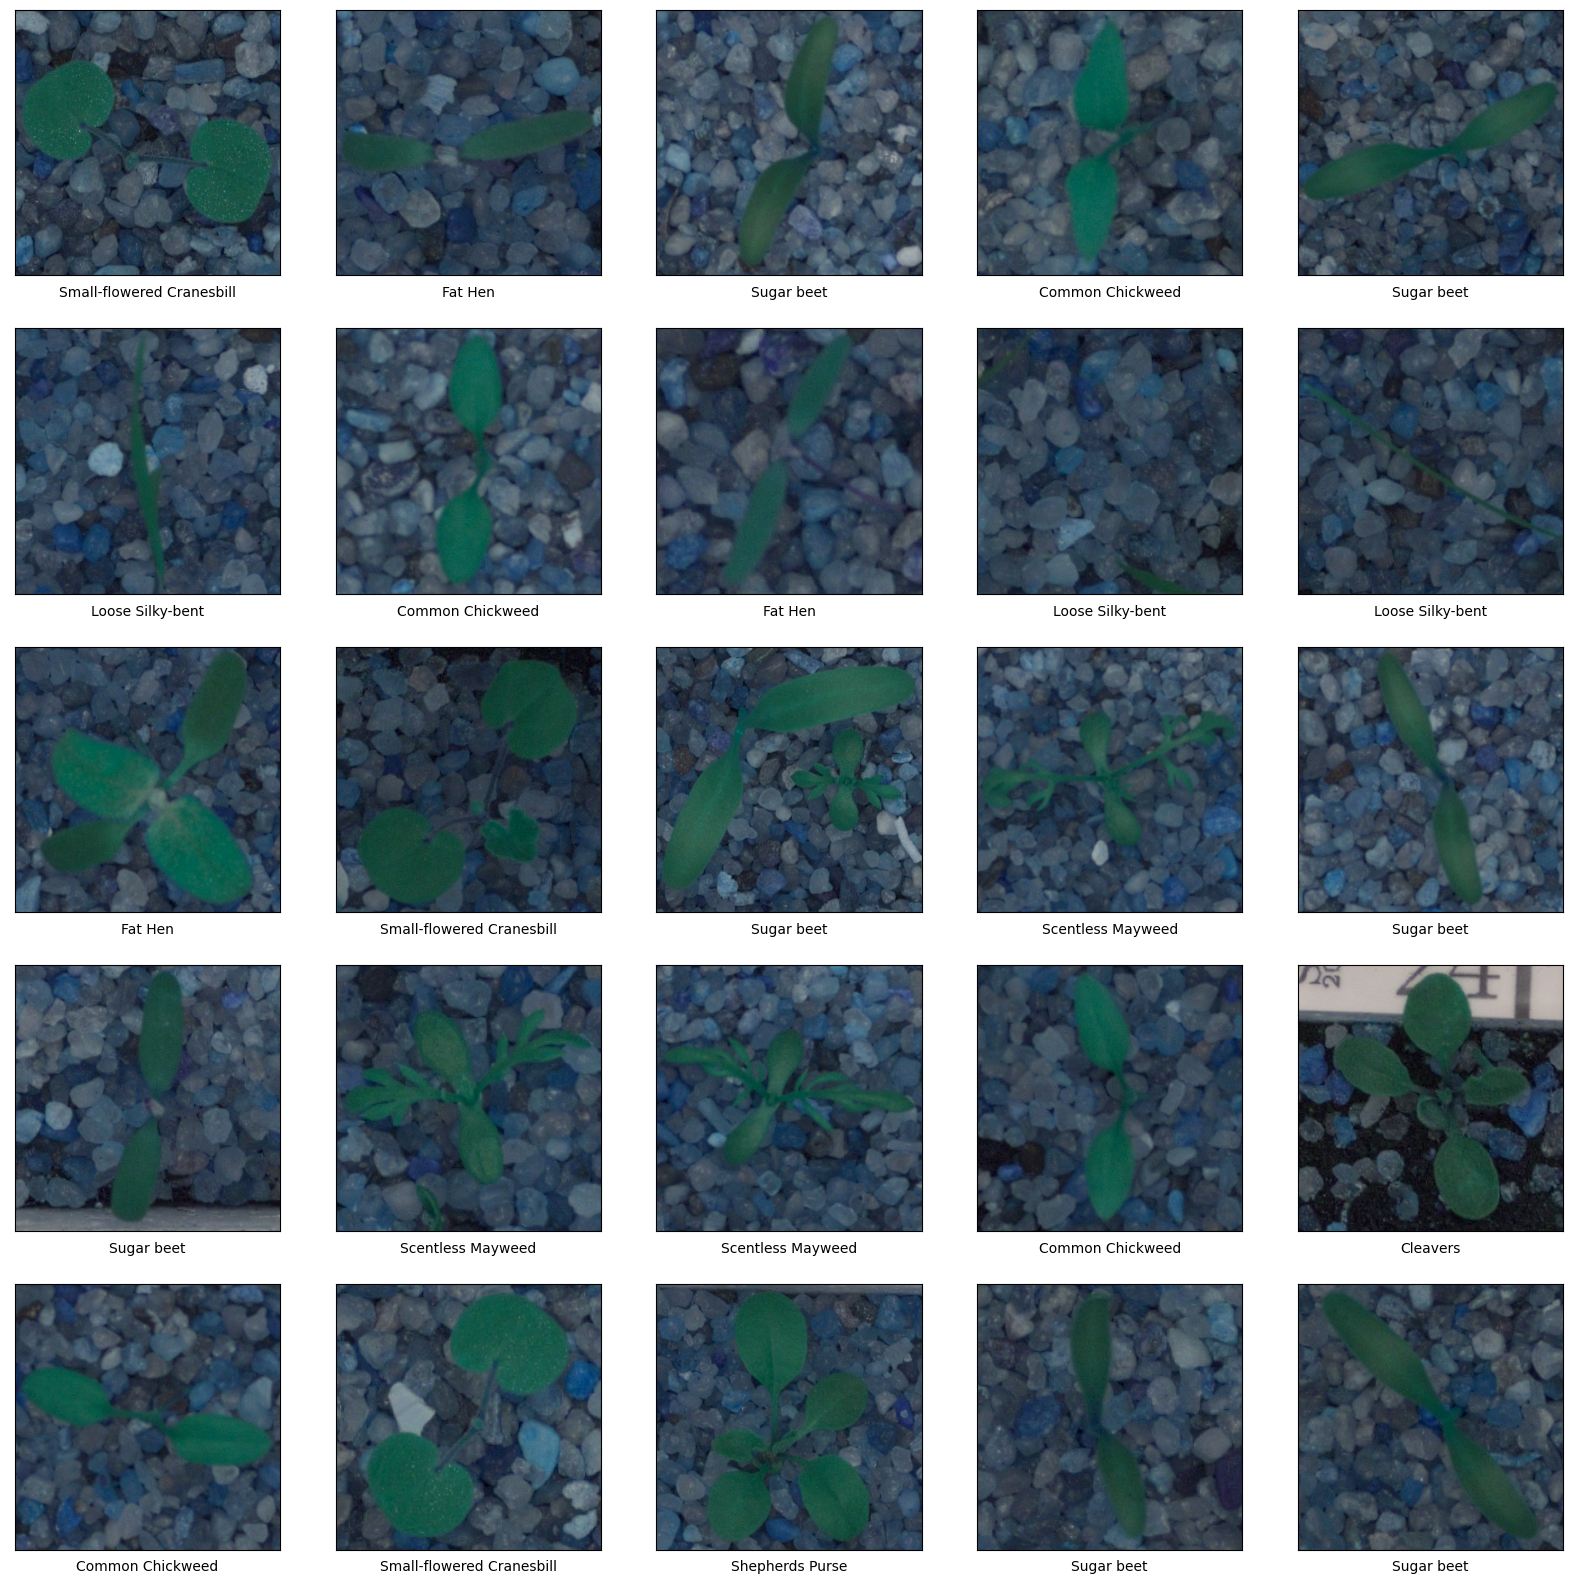

In [34]:
import cv2 as cv
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = cv.imread(r'test\\'+ filenames_to_cls[i][0])
    plt.imshow(img)
    plt.xlabel(filenames_to_cls[i][1])
plt.show()